# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [18]:
%matplotlib inline
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [19]:
# read in readmissions data provided
hospital_read_df=pd.read_csv (r'C:\Users\ozeiri\Downloads\cms_hospital_readmissions.csv')
#hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [20]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\ozeiri\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


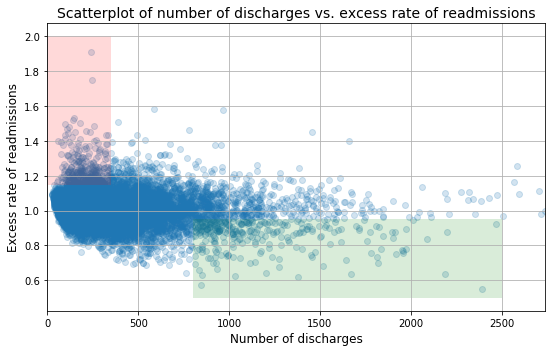

In [21]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [22]:
# Your turn

At the first glance the analysis seems to be right but it lacks the statistical significance since no theory were proven right or not. in the above analysis they reach out a conclusion of a high correlation betwen number of discharges and readmission rate with out descrbing whether the correlarton is positive or negative. Let us cover the analysis done step by step

# A. Initial observations based on the plot above
Overall, rate of readmissions is trending down with increasing number of discharges
With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

In [23]:
df_clean=clean_hospital_read_df

In [24]:
df_clean.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [26]:
df_clean.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


The above describe table shows that we have NAN in the Excess Readmition Rtio we will drop these rates and ceate a new data Frame with only the Exess Readmission rate and Number of discharges columns

In [27]:
df=df_clean[['Excess Readmission Ratio','Number of Discharges']].dropna()
df.columns=['Ratio','Discharges']
df.head()


,Ratio,Discharges
1832,1.0914,25
1699,1.0961,27
1774,1.0934,28
1853,1.0908,29
1290,1.1123,30


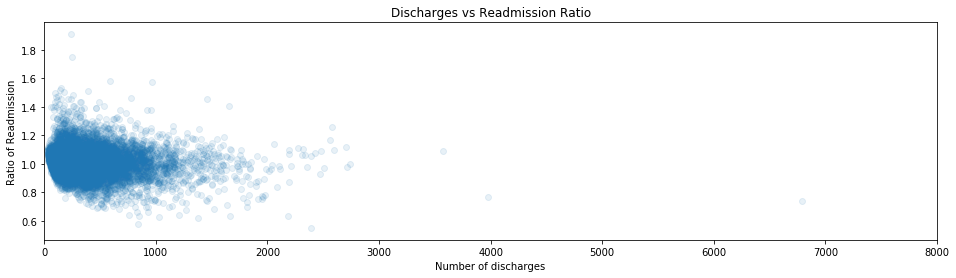

In [28]:
# Now let us plot the scatter plot between the two columns Ratio and Discharges 
plt.figure(figsize=(16, 4))
plt.scatter(x=df.Discharges,y=df.Ratio,alpha=0.1)
plt.xlim(0,8000)
plt.xlabel('Number of discharges')
plt.ylabel('Ratio of Readmission')
plt.title('Discharges vs Readmission Ratio')

plt.show()

now having the df clean and ready to analysis let us double check the statistical analysis they had about  small and large hospitals samll of number of discharges <100 and large of number of discharges >1000

In [29]:
# creating a df for small Hospitals 
df_small=df[df.Discharges<100]
df_small.describe()

,Ratio,Discharges
count,1188.000000,1188.000000
mean,1.022618,74.717172
std,0.057979,16.908819
min,0.893500,25.000000
25%,0.984900,62.000000
50%,1.017750,77.000000
75%,1.052925,89.000000
max,1.495300,99.000000


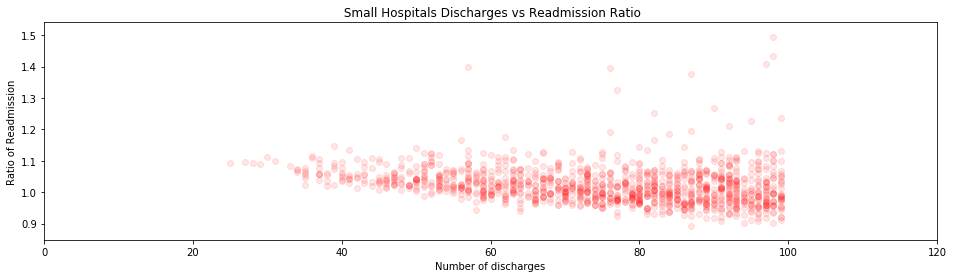

In [30]:
plt.figure(figsize=(16,4))
plt.scatter(x=df_small.Discharges,y=df_small.Ratio,alpha=0.1,color='r')
plt.xlim(0,120)
plt.xlabel('Number of discharges')
plt.ylabel('Ratio of Readmission')
plt.title(' Small Hospitals Discharges vs Readmission Ratio')
plt.show()


In [31]:
# creating a df for Large hospitals
df_large=df[df.Discharges>1000]
df_large.describe()

,Ratio,Discharges
count,463.000000,463.000000
mean,0.978335,1383.427646
std,0.120007,459.109724
min,0.549500,1002.000000
25%,0.907900,1107.000000
50%,0.986400,1242.000000
75%,1.057100,1512.000000
max,1.454300,6793.000000


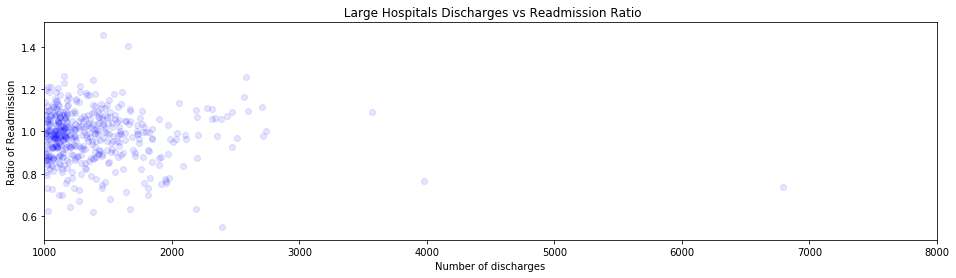

In [32]:
# Ploting the Large hospitals 
plt.figure(figsize=(16,4))
plt.scatter(x=df_large.Discharges,y=df_large.Ratio,alpha=0.1,color='b')
plt.xlim(1000,8000)
plt.xlabel('Number of discharges')
plt.ylabel('Ratio of Readmission')
plt.title(' Large Hospitals Discharges vs Readmission Ratio')
plt.show()

In [33]:
Small_Hospital_mean=round(np.mean(df_small.Ratio),2)
Large_Hospital_mean=round(np.mean(df_large.Ratio),2)
All_Hospitals_mean=round(np.mean(np.concatenate((df_small.Ratio,df_large.Ratio))),2)

print('Small_Hospital_mean is ','',Small_Hospital_mean)
print('Large_Hospital_mean is ','',Large_Hospital_mean)
print('Both_Hospital_mean is ','',All_Hospitals_mean)

Small_Hospital_mean is   1.02
Large_Hospital_mean is   0.98
Both_Hospital_mean is   1.01


In our sample the mean of the Readmission ratio  of the samall hospitals is not the same  that of the large hospitals

The null hypothesis is the correlation between the Readmission Rate and the Discharge is = 0 not correlated


The alternative hypothesis is the readmission ratio is correlation with discharge # zero they are correlated

The Null Hypothesis H0  r = 0

Alt  Hypothesis H1 r # 0

Test statistic: 

In [34]:
# First let us find teh correlation rate of the sample
r =np.corrcoef(df.Discharges,df.Ratio)[0][1]
n=len(df.Ratio)
t_stat = r * np.sqrt(n-2)/np.sqrt(1-r**2)
p_value = stats.t.cdf(x=t_stat, df = n-2) * 2
p_value
print('Sample r: \t {:0.5}\n\nFREQUENTIST RESULTS\nt-statistic: \t {:0.5}\np-value: \t {:0.5}'.format(r, t_stat, p_value))

Sample r: 	 -0.097398

FREQUENTIST RESULTS
t-statistic: 	 -10.492
p-value: 	 1.2225e-25


__In the above FREQUENTIST RESULTS the t-statistic is -10.49 and the p-value is too low almost zero less than 0.01 so the null hypothesis is rejected and there is a correlation between the Readmission ratio and the number of Discharges this correlation is -0.097  so the Ratio and the Number Discharges are negatively correlated__

# Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

While statistical significance relates to whether an effect exists, practical significance refers to the magnitude of the effect. However, no statistical test can tell you whether the effect is large enough to be important in your field of study. Instead, you need to apply your subject area knowledge and expertise to determine whether the effect is big enough to be meaningful in the real world. With tha being said I would recommend more analysis of various data and include new variables to explain the relation between the discharge numbers and readmission ratio since a -9% of correlation is not enough to genealize the negative relation between the Ratio and Discharge 


# Ploting the  data in a different way would help to draw  better conclusions 

C:\Users\ozeiri\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ozeiri\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


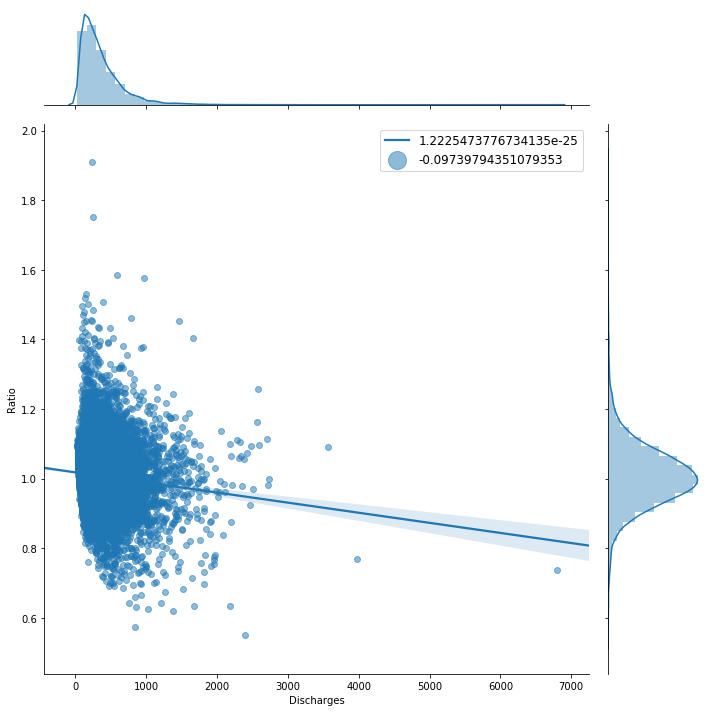

In [35]:
import seaborn as sns

_=sns.jointplot(x='Discharges', y='Ratio', data=df, kind = 'reg', size = 10, scatter_kws = {'alpha' : 0.5})
_=plt.legend((p_value,r),loc='upper right', fontsize='large', markerscale=3)
